# Programming assignment #4
Course: CHE1147H - Data Mining in Engineering

- Name: Kecheng Xiao
- ID: 1008709140

## 0 Library Preparation

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.ticker import MaxNLocator
from metakernel.display import display

## 1 Chemical composition of pottery

## 1.1 Data exploration with PCA

### 1.1.1 Data exploration with PCA

In [23]:
# import 'Pottery' data
df_pottery = pd.read_csv('Pottery.csv')
df_pottery.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [24]:
df_pottery.shape

(26, 7)

**1.1.1)
Q: Which columns will you use in your PCA?
A: We have 7 columns, and we will use all the chemical elements in the PCA model, which are 5 columns.**

### 1.1.2 Preprocess and PCA=3

In [25]:
# Preprocess
df_pottery = df_pottery.drop(['Unnamed: 0'], axis=1)
df_pottery.set_index('Site', inplace=True)
df_pottery.head()

,Al,Fe,Mg,Ca,Na
Site,,,,,
Llanedyrn,14.4,7.00,4.30,0.15,0.51
Llanedyrn,13.8,7.08,3.43,0.12,0.17
Llanedyrn,14.6,7.09,3.88,0.13,0.20
Llanedyrn,11.5,6.37,5.64,0.16,0.14
Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [26]:
# Standardize
scaler = StandardScaler()
df_pottery_sd = scaler.fit_transform(df_pottery)

In [27]:
# PCA n =3
pca = PCA(n_components=3, svd_solver='full')
PC_scores = pca.fit_transform(df_pottery_sd)
scores_pd = pd.DataFrame(data = PC_scores, columns = ['PC1', 'PC2', 'PC3'], index = df_pottery.index)
loadings_pd = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = df_pottery.columns)

display(scores_pd)
display(loadings_pd)

,PC1,PC2,PC3
Site,,,
Llanedyrn,-1.778026,2.289445,-0.075289
Llanedyrn,-0.611193,0.122065,-0.499044
Llanedyrn,-0.722428,0.370209,-0.207550
Llanedyrn,-1.417696,-0.555600,-0.557590
Llanedyrn,-1.486801,-0.004081,0.195248
Llanedyrn,-1.259044,-0.092347,-0.783259
Llanedyrn,-1.180703,-0.607921,-0.575010
Llanedyrn,-1.490385,-0.498745,-0.336582
Llanedyrn,-2.076010,0.000500,0.220714


,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


### 1.1.3 Plot the cumulative explained variance graph

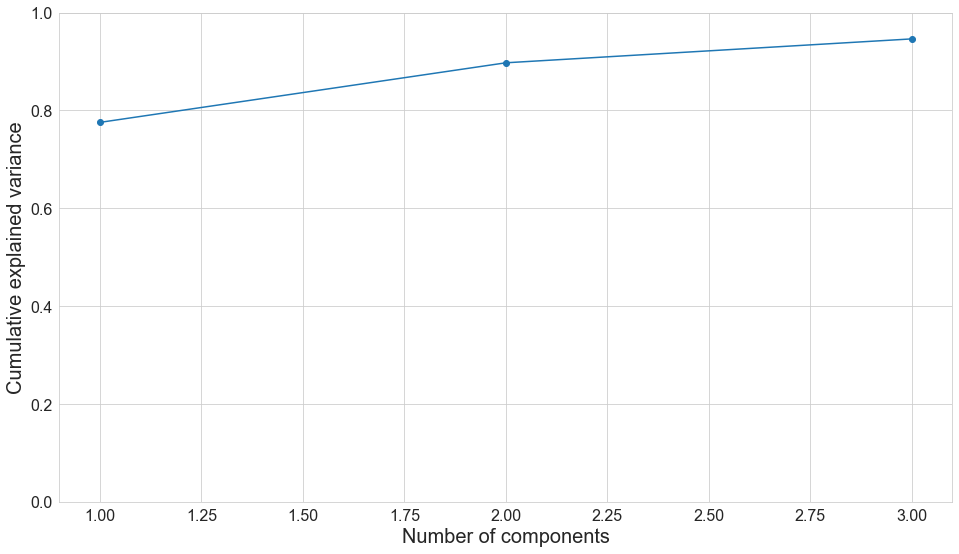

In [28]:
# Plot the cumulative explained variance graph
plt.plot(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20)
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

**1.1.3)
Q: What percent of the variance do the first 2 and 3 components describe?
A: First two explain 95% of data variance and with the PC3 all variance(100%) are described.**

### 1.1.4 Plot the scores-loadings graph for PC1-PC2

In [29]:
def pca_scatter_plot(scores, loadings, loading_labels=None, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scale_xt = 1.0/(xt.max() - xt.min())
    scale_yt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scale_xt
    yt_scaled = yt * scale_yt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    color_map = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
                 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    label_map = scores_pd.index.unique().to_list()
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11, color=color_map[label_map.index(label)])

    for a in range(n):
        plt.arrow(0, 0, p_scaled[a, 0], p_scaled[a, 1], color ='r', alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[a, 0], p_scaled[a, 1], "Var" + str(a + 1), color ='g', ha ='center', va ='center')
        else:
            plt.text(p_scaled[a, 0], p_scaled[a, 1], loading_labels[a], color ='r', ha ='center', va ='center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20)
    plt.ylabel("PC{}".format(2), fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid()

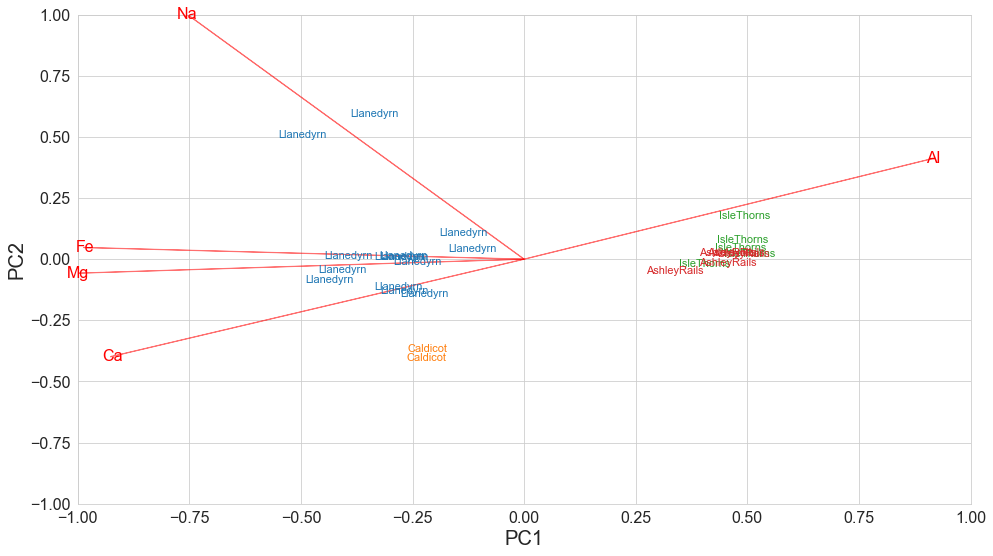

In [30]:
# plot
plt.rcParams["figure.figsize"] = [16,9]
pca_scatter_plot(PC_scores[:,:2], loadings_pd.iloc[:,:2], loading_labels=loadings_pd.index, score_labels=scores_pd.index)
plt.grid()
plt.show()

### 1.1.5
**Q: How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?
A: According to the score-loading plot of PC1 and PC2, we can see raw material from Isle Thorns and Ashley Rails are in the same cluster, which has less Mg and Fe elements and more of Al. This composition can be beneficial for manufacturing Product B.**

### 1.1.6
**Q: Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?
A: The raw material from Caldicot can be a good replacement for the Llanedyrn(better than other two regions at least); judging by the plot, these two are different on raw material components. The Caldicot has lesser Na, and slightly lesser Fe comparing to the average of the Llanedyrn.**

### 1.1.7
**Q: What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot diﬀerent than the Llanedyrn samples?
A: The major differences are the percentage of Fe, Mg, Ca and the percentage of Al. (Llanedyrn, Caldicot)'s has more Mg, Fe and Ca; in comparison, (Isle Thorns, Ashley Rails)'s has more Al. The two sample from Caldicot has lesser Na, and slightly lesser Fe comparing to the average of the Llanedyrn.**

### 1.1.8 Boxplot of Elements

In [59]:
df_pottery.reset_index(level=0, inplace=True)

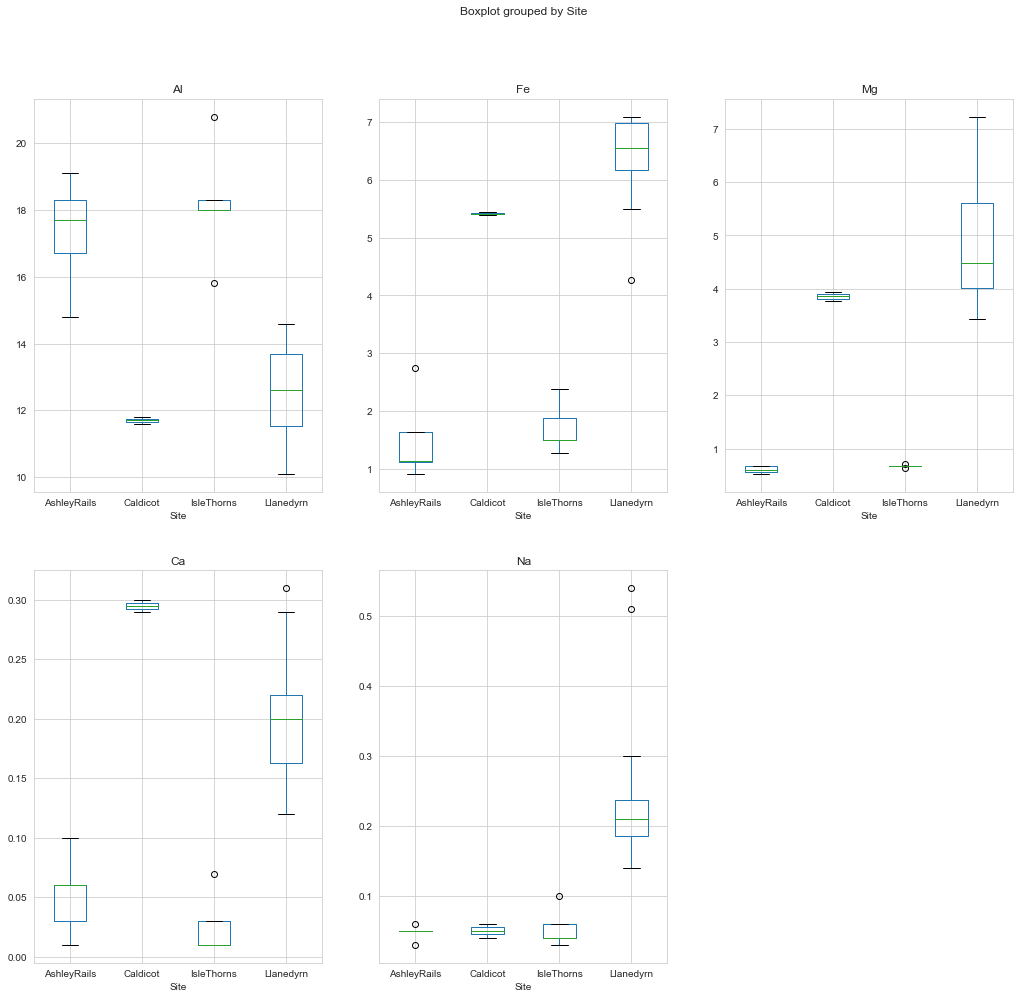

In [81]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,16))
df_pottery.boxplot(column='Al', by='Site', ax=axes[0,0])
df_pottery.boxplot(column='Fe', by='Site', ax=axes[0,1])
df_pottery.boxplot(column='Mg', by='Site', ax=axes[0,2])
df_pottery.boxplot(column='Ca', by='Site', ax=axes[1,0])
df_pottery.boxplot(column='Na', by='Site', ax=axes[1,1])
fig.delaxes(axes[1,2])
plt.show()

## 2 Batch data analysis

### 2.1.1 Import and Clean

In [101]:
df_pottery_batch = pd.read_excel('bakers_yeast_reference_batches.xlsx', sheet_name='Sheet1')
df_pottery_batch = df_pottery_batch.drop(['Unnamed: 0', 'Primary ID'], axis=1)
df_pottery_batch.head()

,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,bb,0.000000,0.05059,31.9580,212.328,6.16453,1382.19,43.4194,5.85607
1,bb,0.166667,0.04930,31.5303,835.476,29.78270,2084.42,43.4853,5.34603
2,bb,0.333333,0.04973,30.8220,910.155,32.50710,2266.47,43.5628,5.18718
3,bb,0.500000,0.04915,30.1617,985.011,36.37100,2446.84,43.6002,5.18043
4,bb,0.666667,0.04744,29.8891,1052.450,39.26990,2636.96,43.6572,5.18145


In [102]:
df_pottery_batch['BatchID'].unique()

array(['bb', 'cb', 'db', 'eb', 'fb', 'gb', 'hb', 'ib', 'jb', 'kb', 'lb',
       'Ma', 'Na', 'Ta', 'Va', 'Xa'], dtype=object)

**Q: How many batches are in the data?
A: There are 16 batches in the data.**

In [103]:
df_pottery_batch.groupby('BatchID')['Time'].max()-df_pottery_batch.groupby('BatchID')['Time'].min()

BatchID
Ma    13.6667
Na    13.6667
Ta    13.6667
Va    13.6667
Xa    13.6667
bb    13.6667
cb    13.6667
db    13.6667
eb    13.6667
fb    13.6667
gb    13.6667
hb    13.6667
ib    13.6667
jb    13.6667
kb    13.6667
lb    13.6667
Name: Time, dtype: float64

**Q: What is the duration of each batch?
A: They all have 13.6667 (time unit) as duration.**

In [104]:
df_pottery_batch['BatchID'].value_counts()

bb    83
cb    83
db    83
eb    83
fb    83
gb    83
hb    83
ib    83
jb    83
kb    83
lb    83
Ma    83
Na    83
Ta    83
Va    83
Xa    83
Name: BatchID, dtype: int64

**Q: How many data points are there per batch?
A: They all have 83 data points**

In [105]:
df_pottery_batch.columns

Index(['BatchID', 'Time', 'Ethanol', 'Temperature', 'Molasses flow',
       'NH3 flow', 'Air flow', 'Level', 'pH'],
      dtype='object')

**Q: How many variables are measured (including time)?
A: After dropping the meta-data columns, we have 8 variables.**

### 2.1.2 Plot the variables time-profiles

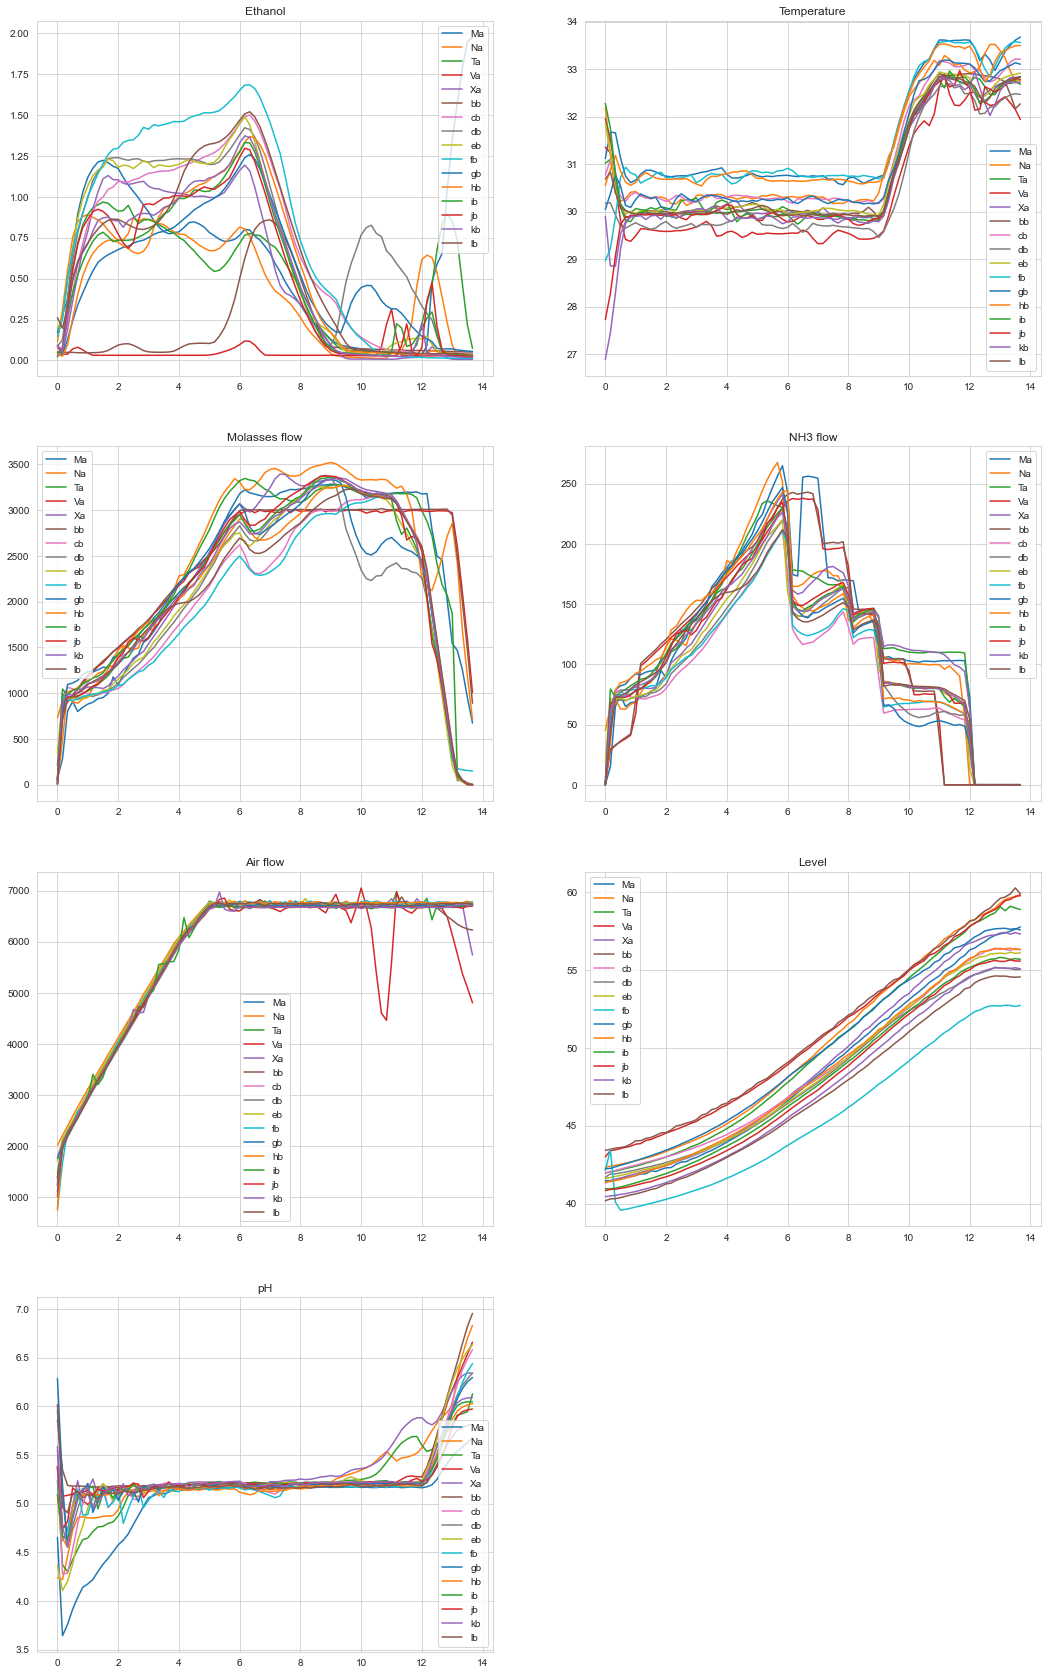

In [106]:
plt.figure(figsize=(18,30))
for i in range(len(df_pottery_batch.columns)-2):
    plt.subplot(4,2,i+1)
    for sub in df_pottery_batch.groupby('BatchID'):
        df_pottery_sub = pd.DataFrame(sub[1])
        feat = df_pottery_batch.columns[2+i]
        plt.plot(df_pottery_sub['Time'], df_pottery_sub[feat], label=sub[0])
        plt.title(feat)
        plt.legend()

**Q: Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?
A: The outliers are fb, bb and Va in Ethanol; Va in Air flow and Ma in pH. The Ethanol has the largest variability (Temperature, NH3 flow, Molasses flow are the second largest) and Air flow and PH are tightly controlled.**

### 2.1.3 Pre-process and perform PCA n=5

In [107]:
df_pottery_batch.set_index('BatchID', inplace=True)

In [108]:
scaler = StandardScaler()
df_pottery_batch_sd = scaler.fit_transform(df_pottery_batch)
pca = PCA(n_components=5, svd_solver='full')
PC_scores = pca.fit_transform(df_pottery_batch_sd)
scores_pd = pd.DataFrame(data = PC_scores, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_pottery_batch.index)
display(scores_pd)
loadings_pd = pd.DataFrame(data = pca.components_.T ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_pottery_batch.columns)
display(loadings_pd)

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488
bb,-1.790453,2.816650,1.059588,0.979711,0.160562
bb,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446


,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


### 2.1.4 Pivot the scores BatchID with index 'Time'

In [109]:
scores_pd['Time'] = df_pottery_batch['Time']
scores_pd = pd.pivot_table(scores_pd, values=['PC1', 'PC2', 'PC3','PC4','PC5'], index='Time', columns='BatchID')
scores_pd

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

### 2.1.5 Plot the scores-loadings plot

In [110]:
def pca_scatter_plot(scores, loadings, loading_labels=None, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scale_xt = 1.0/(xt.max() - xt.min())
    scale_yt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scale_xt
    yt_scaled = yt * scale_yt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)

    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)

    for a in range(n):
        plt.arrow(0, 0, p_scaled[a, 0], p_scaled[a, 1], color ='r', alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[a, 0], p_scaled[a, 1], "Var" + str(a + 1), color ='g', ha ='center', va ='center')
        else:
            plt.text(p_scaled[a, 0], p_scaled[a, 1], loading_labels[a], color ='r', ha ='center', va ='center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20)
    plt.ylabel("PC{}".format(2), fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid()

In [111]:
def pca_line_plot(scores, loadings, loading_labels=None, line_style=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores['PC1']
    yt = scores['PC2']
    n = loadings.shape[0]
    scale_xt = 1.0/(xt.max() - xt.min())
    scale_yt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scale_xt
    yt_scaled = yt * scale_yt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)

    for col in xt_scaled.columns:
        plt.plot(xt_scaled[col], yt_scaled[col], linestyle=line_style, label=col)

    for a in range(n):
        plt.arrow(0, 0, p_scaled[a, 0], p_scaled[a, 1], color ='r', alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[a, 0], p_scaled[a, 1], "Var" + str(a + 1), color ='g', ha ='center', va ='center')
        else:
            plt.text(p_scaled[a, 0], p_scaled[a, 1], loading_labels[a], color ='r', ha ='center', va ='center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20)
    plt.ylabel("PC{}".format(2), fontsize=20)
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=2, colors='black')
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=2, colors='black')
    plt.tick_params(labelsize=16)
    plt.grid()

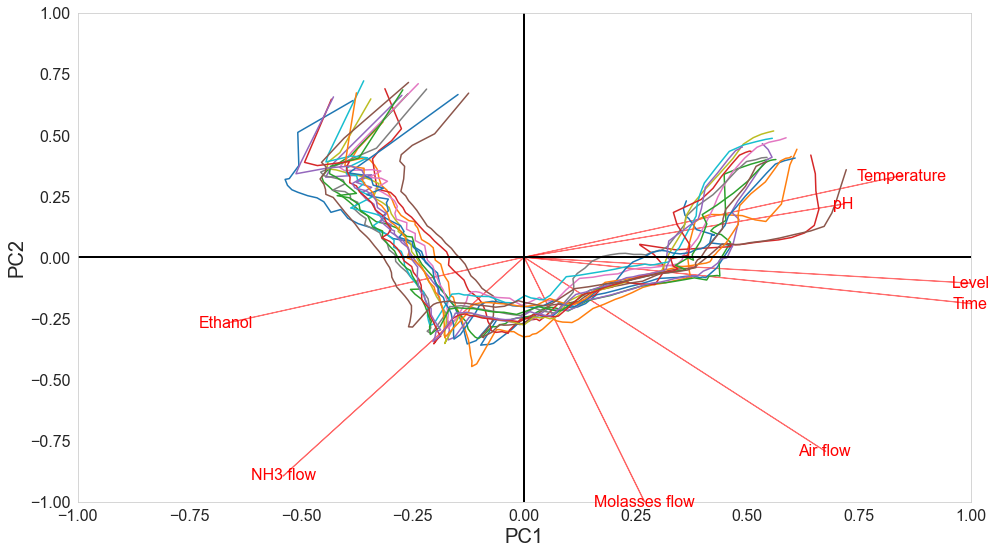

In [112]:
plt.rcParams["figure.figsize"] = [16,9]
pca_line_plot(scores_pd.iloc[:,:32], loadings_pd.iloc[:,:2],
                 loading_labels=loadings_pd.index)
plt.show()

### 2.1.6. Explain
**Q: In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase?
A: The batches start in the second quarter and end in the first. At the kink, the Temperature and pH rise up and Level and Airflow also slight increase, while Molasses flow remains unchanged and Ethanol and NH3 flow largely decreased. In the first phase, the NH3 flow does not change, and in the second phase, the Molasses flow remains unchanged.**

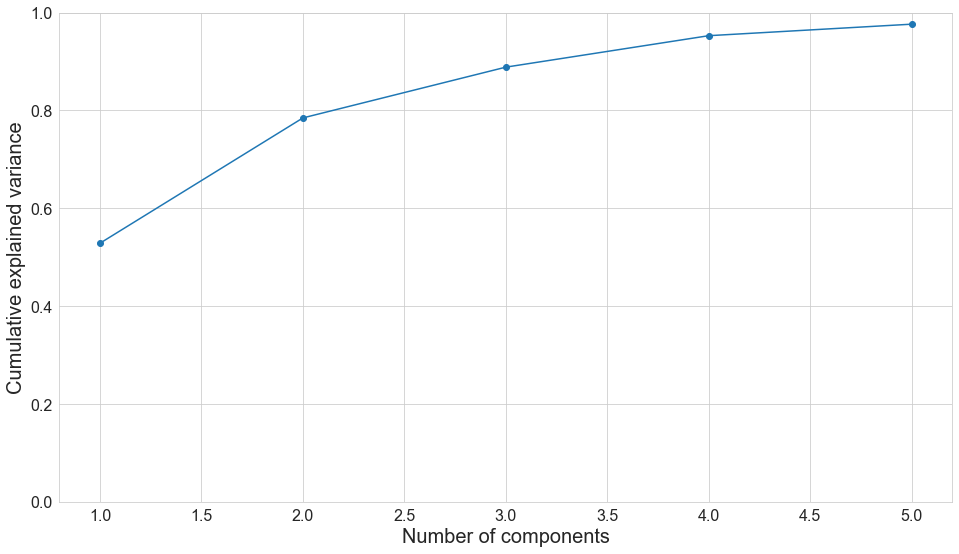

In [113]:
# Plot the cumulative explained variance graph
plt.plot(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20)
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

### 2.1.7 Cumulative Explained Variance
**Q: How much variance do the first two principal components capture?
A: The first two principal components capture about 80 percent of variance.**

## 2.2 Use the model to monitor running batches

### 2.2.1 Load the data and PCA

In [114]:
df_today_batch = pd.read_excel('todays_batches.xlsx', sheet_name='Sheet1')
df_today_batch = df_today_batch.drop(['Unnamed: 0', 'Primary ID'], axis=1)
df_today_batch.set_index('BatchID', inplace=True)
df_today_batch

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...
Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989


In [115]:
df_today_batch_td = scaler.transform(df_today_batch)
PC_scores_td = pca.transform(df_today_batch_td)
scores_pd_td = pd.DataFrame(data = PC_scores_td, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_today_batch.index)
display(scores_pd_td)
loadings_pd_td = pd.DataFrame(data = pca.components_.T ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_today_batch.columns)
display(loadings_pd_td)

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
Ya,-3.096781,3.798958,1.166746,0.602916,0.937231
Ya,-3.715861,3.216763,2.529801,-1.183846,0.839431
Ya,-3.928722,2.972255,1.411527,-2.217525,1.037556
Ya,-4.362027,1.145315,-0.230988,-2.807162,1.130690
Ya,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...
Za,4.177559,2.589581,-2.097027,0.924135,-0.524341
Za,4.329929,2.726441,-2.361650,1.062921,-0.615614
Za,4.401519,2.857172,-2.506579,1.158278,-0.667658


,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [116]:
scores_pd_td['Time'] = df_today_batch['Time']
scores_pd_td = pd.pivot_table(scores_pd_td, values=['PC1', 'PC2', 'PC3','PC4','PC5'], index='Time', columns='BatchID')
scores_pd_td

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

### 2.2.2 Plot scores-loadings plot

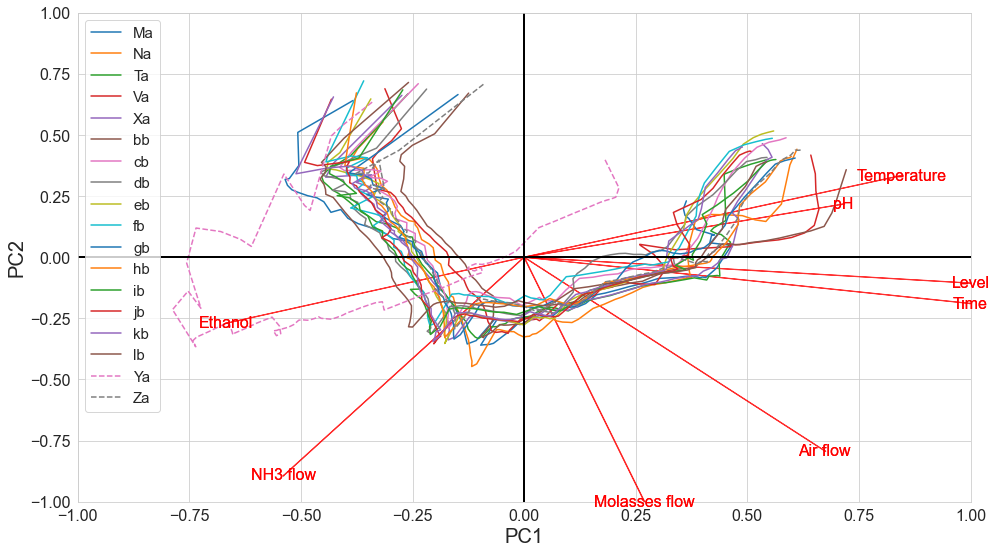

In [117]:
plt.rcParams["figure.figsize"] = [16,9]
pca_line_plot(scores_pd.iloc[:,:32], loadings_pd.iloc[:,:2], loading_labels=loadings_pd.index)
pca_line_plot(scores_pd_td.iloc[:,:4], loadings_pd_td.iloc[:,:2],
              loading_labels=loadings_pd.index, line_style='dashed')
plt.legend(fontsize=15)
plt.show()

### 2.2.3 Explain

**Q: Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?
A: Za batch shows the similar behaviour to the previous; however, Ya batch has a rapid rise of Ethanol in the first phase, which is a sign of being an outlier.**

## 3 A PAT application

### 3.2 Task #1: Unsupervised learning, PCA of NIR data

### A. Generate the plot of all the training set raw NIR data

In [183]:
df_NIR_train = pd.read_excel('sawdust_train.xlsx', sheet_name='sawdust_train')
df_NIR_train.head()

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35


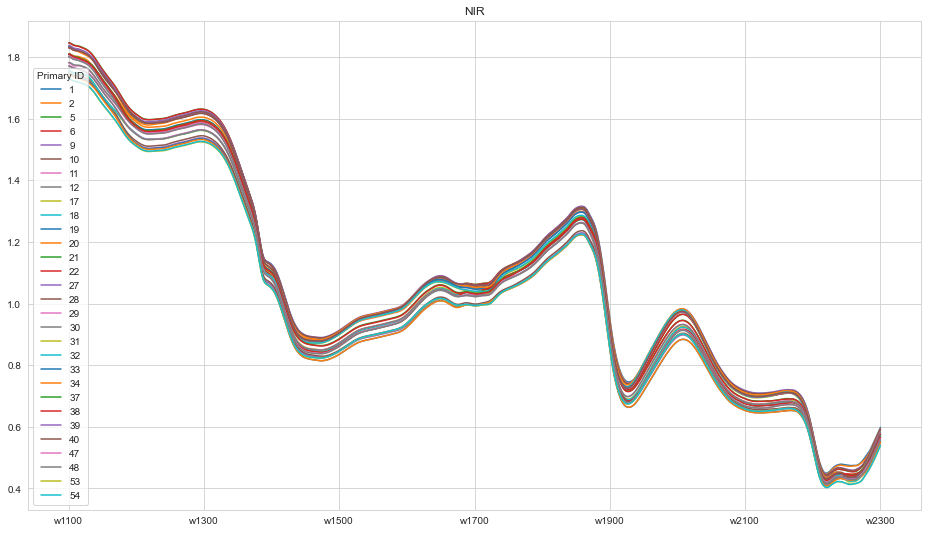

In [184]:
# A. Generate the plot of all the training set raw NIR data
df_NIR_train_transpose = df_NIR_train.set_index((df_NIR_train['Primary ID'])).iloc[:,2:1203].transpose()
df_NIR_train_transpose.plot()
plt.title('NIR')
plt.show()

### B. Pre-process the NIR data and perform PCA for 5 components

In [185]:
# B. Pre-process the NIR data and perform PCA for 5 components
ID_OBSNAM = [str(df_NIR_train['Primary ID'][i]) +'-'+ (df_NIR_train['OBSNAM'][i]) for i in range(len(df_NIR_train['Primary ID']))]
df_NIR_train['ID_OBSNAM'] = ID_OBSNAM
df_NIR_train = df_NIR_train.drop(['Primary ID', 'OBSNAM', 'Spruce', 'Pine', 'Birch'], axis=1)
df_NIR_train.set_index('ID_OBSNAM', inplace=True)
df_NIR_train

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
ID_OBSNAM,,,,,,,,,,,,,,,,,,,,,
1-02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,...,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
2-02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,...,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
5-15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,...,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
6-15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,...,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
9-08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,...,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635
10-08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,...,0.547361,0.552224,0.557200,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067
11-13a,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,1.77113,1.77084,...,0.537287,0.543007,0.548699,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057
12-13b,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,1.77433,1.77397,...,0.539009,0.543364,0.547846,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234
17-11a,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,1.80026,1.79969,...,0.528280,0.533482,0.538662,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966


In [186]:
scaler = StandardScaler(with_std=False)
df_NIR_scaled = scaler.fit_transform(df_NIR_train)

pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(df_NIR_scaled)

scores_tr = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = df_NIR_train.index)
loadings_tr = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = df_NIR_train.columns)

### C. Plot the cumulative explained variance versus the number of components

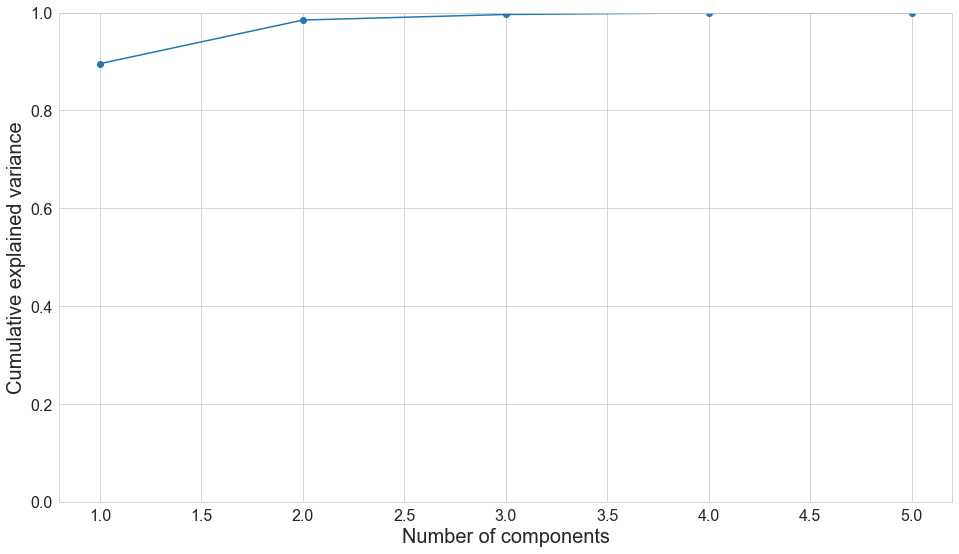

array([8.95578453e-01, 8.91453334e-02, 1.13592173e-02, 3.33151722e-03,
       2.25172377e-04])

In [187]:
# Plot the cumulative explained variance graph
plt.plot(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20)
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()
pca.explained_variance_ratio_

**Q: How many components do we need to capture 99% of the variance?
A: We need 3 PCs to reach 99% of variance.**

### D. Plot the PCA scores for the first two components

In [188]:
# D. Plot the PCA scores for the first two components. Comment on any outliers, trends, clusters etc
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scale_xt = 1.0/(xt.max() - xt.min())
    scale_yt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scale_xt
    yt_scaled = yt * scale_yt

    plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)

    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20)
    plt.ylabel("PC{}".format(2), fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid()

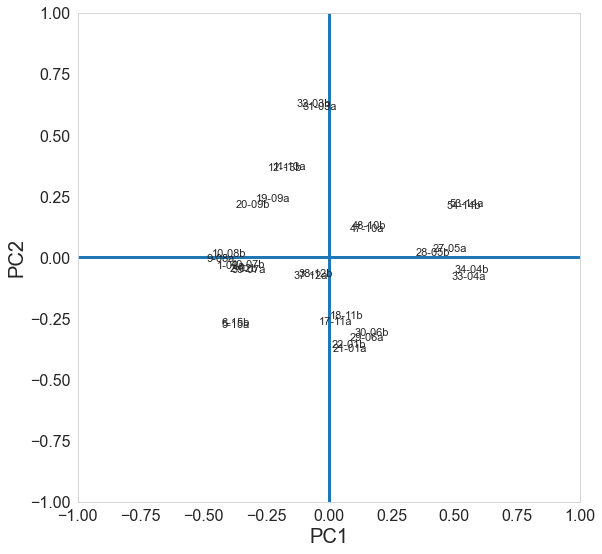

In [189]:
score_plot(pca_scores[:,:2], score_labels=scores_tr.index)
plt.show()

**Q: Comment on any outliers, trends, clusters etc (if any)
A: We can barely identify three main clusters form at PC2=0.0 and PC1=-0.5; PC2=-0.25 and PC1=0.0; PC2=0.0 and PC1=0.25, all other small clusters are all formed by pairs, which is interesting. Due to this, there is no clear trend and no clear outlier.**

### E. Plot the loadings of the first two components

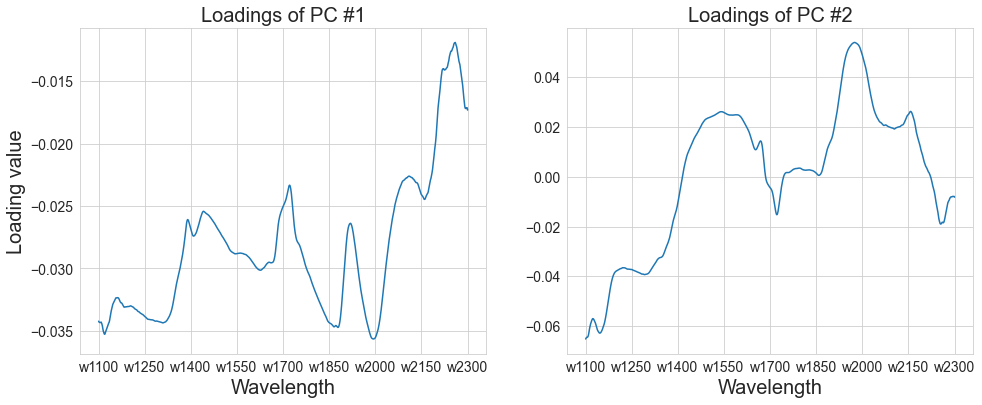

In [190]:
# E. Plot the loadings of the first two components and comment on which wavelengths seem to be important for different PCs. Don’t describe the graphs in words. In two sentences, describe any significant trends or signals (if any)
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_tr['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_tr['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

plt.show()

**Q: Which wavelengths seem to be important for diﬀerent PCs?
A: For PC1, seems all wavelengths have negative values, so w1100, w1250 to w1300, w1800 to w1900 contribute the most. For PC2, w1500 to w1600 all have impact on forming this PC, so as w1950 to w2050.**

### F. PCA for the test set

In [191]:
df_NIR_test = pd.read_excel('sawdust_pred.xlsx', sheet_name='sawdust_pred')
ID_OBSNAM = [str(df_NIR_test['Primary ID'][i]) +'-'+ (df_NIR_test['OBSNAM'][i]) for i in range(len(df_NIR_test['Primary ID']))]
df_NIR_test['ID_OBSNAM'] = ID_OBSNAM
df_NIR_test = df_NIR_test.drop(['Primary ID', 'OBSNAM', 'Spruce', 'Pine', 'Birch'], axis=1)
df_NIR_test.set_index('ID_OBSNAM', inplace=True)
df_NIR_test

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
ID_OBSNAM,,,,,,,,,,,,,,,,,,,,,
3-27a,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,...,0.538656,0.543831,0.549036,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663
4-27b,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,...,0.539687,0.544487,0.549293,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786
7-25a,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,...,0.535891,0.540838,0.545726,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059
8-25b,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,...,0.530337,0.535487,0.540901,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698
13-17a,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,...,0.517237,0.521950,0.526659,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163
14-17b,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,...,0.512516,0.517724,0.522906,0.528003,0.532696,0.537328,0.542243,0.547303,0.552375,0.556934
15-20a,1.80338,1.80302,1.80225,1.80105,1.79942,1.79753,1.79581,1.79451,1.79374,1.79332,...,0.532382,0.537769,0.543276,0.548729,0.554031,0.559213,0.564588,0.569960,0.575186,0.580128
16-20b,1.80347,1.80308,1.80243,1.80148,1.80018,1.79860,1.79707,1.79572,1.79466,1.79390,...,0.534359,0.539131,0.544370,0.549973,0.555515,0.560995,0.566629,0.572065,0.577189,0.581623
23-26a,1.77958,1.77923,1.77851,1.77739,1.77585,1.77407,1.77236,1.77096,1.77002,1.76940,...,0.516593,0.521363,0.526337,0.531467,0.536348,0.540972,0.545828,0.550341,0.554430,0.557804


In [192]:
df_NIR_test_sd = scaler.transform(df_NIR_test)
PC_scores_sd = pca.transform(df_NIR_test_sd)
scores_ts_sd = pd.DataFrame(data = PC_scores_sd, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_NIR_test.index)
display(scores_ts_sd)
loadings_ts_sd = pd.DataFrame(data = pca.components_.T ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_NIR_test.columns)
display(loadings_ts_sd)

,PC1,PC2,PC3,PC4,PC5
ID_OBSNAM,,,,,
3-27a,-0.755046,0.082224,-0.106194,-0.006280,-0.046023
4-27b,-0.741493,0.043018,-0.104981,-0.027725,-0.054997
7-25a,0.526514,-0.235156,0.004148,0.154854,-0.024401
8-25b,0.670262,-0.195146,0.011119,0.151286,-0.022596
13-17a,0.795253,-0.046558,0.035398,-0.030072,-0.035528
14-17b,0.901669,0.006261,0.039356,-0.028244,-0.028235
15-20a,-0.215814,-0.066147,-0.061746,0.075020,-0.013988
16-20b,-0.286806,-0.037825,-0.066603,0.083834,-0.004424
23-26a,0.614048,-0.071040,0.078673,-0.036015,-0.001160


,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


### G. Create a scatter plot of the scores in PC1, PC2

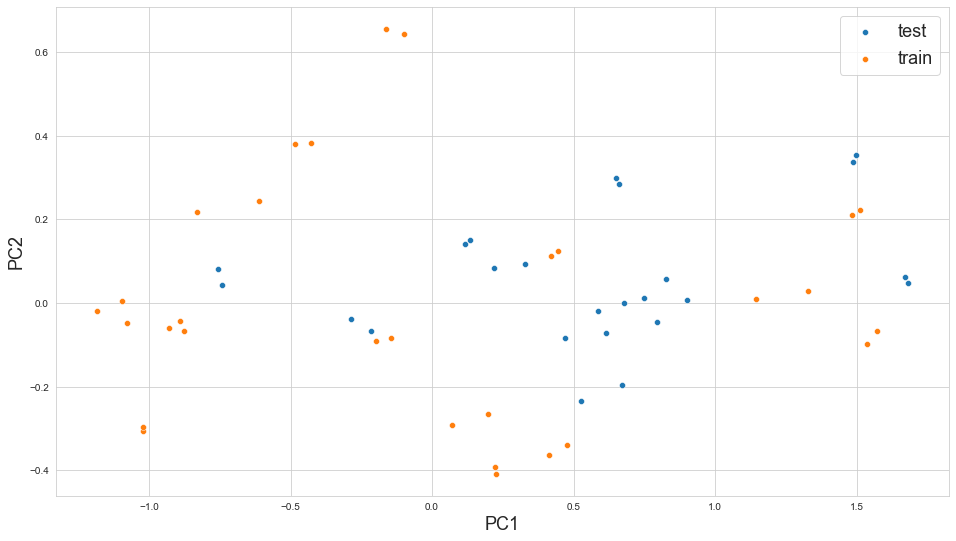

In [193]:
sns.scatterplot(x=scores_ts_sd['PC1'], y=scores_ts_sd['PC2'], label='test')
sns.scatterplot(x=scores_tr['PC1'], y=scores_tr['PC2'], label='train')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
plt.legend(fontsize=18)
plt.show()

**Q: Why is it important to overlap the scores of both train and test set in one graph? What are you checking to see?
A: By overlap the scores of both sets, we can clearly see how different (or similar) they are. In thi case, there is still no clear pattern from test set. However, combining the result from train set, the train data on the upper left region are likely to be outliers, since no test set data are mixed in that area.**

## 3.3 Task #2: Supervised learning, PLS model

### A. Run the PLS regression to model all 3 outputs

In [224]:
from sklearn.cross_decomposition import PLSRegression
df_NIR_train_out = pd.read_excel('sawdust_train.xlsx', sheet_name='sawdust_train')
df_NIR_train_out = df_NIR_train_out.iloc[:,-3:]

pls_sklearn_sp = PLSRegression(n_components=4, scale=False)
pls_sklearn_sp.fit(scores_tr, df_NIR_train_out['Spruce'])
pls_sklearn_sp.score(scores_tr, df_NIR_train_out['Spruce'])

0.9705346387808261

In [225]:
pls_sklearn_pi = PLSRegression(n_components=3, scale=False)
pls_sklearn_pi.fit(scores_tr, df_NIR_train_out['Pine'])
pls_sklearn_pi.score(scores_tr, df_NIR_train_out['Pine'])

0.9384779639849624

In [226]:
pls_sklearn_bi = PLSRegression(n_components=3, scale=False)
pls_sklearn_bi.fit(scores_tr, df_NIR_train_out['Birch'])
pls_sklearn_bi.score(scores_tr, df_NIR_train_out['Birch'])

0.9856063948137704

### B. Predict the output values for the inputs

In [227]:
df_NIR_test_out = pd.read_excel('sawdust_pred.xlsx', sheet_name='sawdust_pred')
df_NIR_test_out = df_NIR_test_out.iloc[:,-3:]

In [240]:
# Spruce
y_train_predicted_sp = pls_sklearn_sp.predict(scores_tr)
y_test_predicted_sp = pls_sklearn_sp.predict(scores_ts_sd)

# Pine
y_train_predicted_pi = pls_sklearn_pi.predict(scores_tr)
y_test_predicted_pi = pls_sklearn_pi.predict(scores_ts_sd)

# Birch
y_train_predicted_bi = pls_sklearn_bi.predict(scores_tr)
y_test_predicted_bi = pls_sklearn_bi.predict(scores_ts_sd)

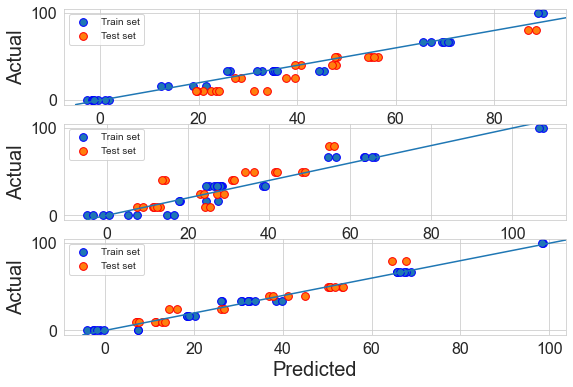

In [245]:
fig = plt.figure(figsize=(9, 6))
sub1 = fig.add_subplot(311)
plt.scatter(y_train_predicted_sp, df_NIR_train_out['Spruce'], s=60, marker="o", edgecolors='b')
plt.scatter(y_test_predicted_sp, df_NIR_test_out['Spruce'], s=60, marker="o", edgecolors='r')
plt.axline([0, 0], slope=1)
plt.legend(['Train set', 'Test set'])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.tick_params(labelsize=16)

sub2 = fig.add_subplot(312)
plt.scatter(y_train_predicted_pi, df_NIR_train_out['Pine'], s=60, marker="o", edgecolors='b')
plt.scatter(y_test_predicted_pi, df_NIR_test_out['Pine'], s=60, marker="o", edgecolors='r')
plt.axline([0, 0], slope=1)
plt.legend(['Train set', 'Test set'])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.tick_params(labelsize=16)

sub3 = fig.add_subplot(313)
plt.scatter(y_train_predicted_bi, df_NIR_train_out['Birch'], s=60, marker="o", edgecolors='b')
plt.scatter(y_test_predicted_bi, df_NIR_test_out['Birch'], s=60, marker="o", edgecolors='r')
plt.axline([0, 0], slope=1)
plt.legend(['Train set', 'Test set'])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.tick_params(labelsize=16)
plt.show()